<a href="https://colab.research.google.com/github/NagamallaVinay/Task-7/blob/main/Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 7: Support Vector Machines (SVM)**
 **Objective**: Use SVMs for linear and non-linear classification.


 **Tools**:  Scikit-learn, NumPy, Matplotlib

# **Importing Libraries and Loading the Dataset**

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Set plot style
plt.style.use('ggplot')



#Load the Data
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('breast-cancer.csv')
print("breast-cancer dataset loaded successfully.\n")


print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Information:")
df.info()

Saving breast-cancer.csv to breast-cancer.csv
breast-cancer dataset loaded successfully.

First 5 rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030   

# **1.Load and prepare a dataset for binary classification.**
we need to clean and prepare the data. This involves:
Dropping the unnecessary id column.

*   Dropping the unnecessary id column.
*   Converting the diagnosis column into numerical values
*   Separating the data into features (X) and the target variable (y).
*   Splitting the data into training and testing sets.
* Scaling the features, which is crucial for SVMs to perform well.

In [3]:
# As is is identifier & not predictive feature . Let's drop
df = df.drop('id', axis=1)

label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Separating the data into features (X) and the target variable (y).
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Splitting the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features, which is crucial for SVMs to perform well
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# **2. Train and Evaluate SVM Models (Linear and RBF Kernels)**

**Linear SVM**: This model tries to find a straight line (or a flat plane in higher dimensions) to separate the two classes.

**RBF SVM:** This model uses the Radial Basis Function (RBF) kernel to create a more complex, non-linear decision boundary, which can capture more intricate patterns in the data.

In [4]:
# Linear SVM
linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X_train_scaled, y_train)

# Prediction on test set
y_pred_linear = linear_svm.predict(X_test_scaled)

# Evaluate the Model
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Linear SVM Accuracy: {accuracy_linear:.2f}")
print("\nClassification by Linear SVM Report :")
print(classification_report(y_test, y_pred_linear))

Linear SVM Accuracy: 0.96

Classification by Linear SVM Report :
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [5]:
# RBF SVM

# Training RBF SVM
rbf_svm = SVC(kernel='rbf', random_state=42)
rbf_svm.fit(X_train_scaled, y_train)

# Make predictions on test set
y_pred_rbf = rbf_svm.predict(X_test_scaled)

# Evaluate the Model
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF SVM Accuracy: {accuracy_rbf:.2f}")
print("\nClassification Report (RBF SVM):")
print(classification_report(y_test, y_pred_rbf))

RBF SVM Accuracy: 0.98

Classification Report (RBF SVM):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# **3.Visualize decision boundary using 2D data.**

Confusion Matrix for Linear SVM & RBF SVM

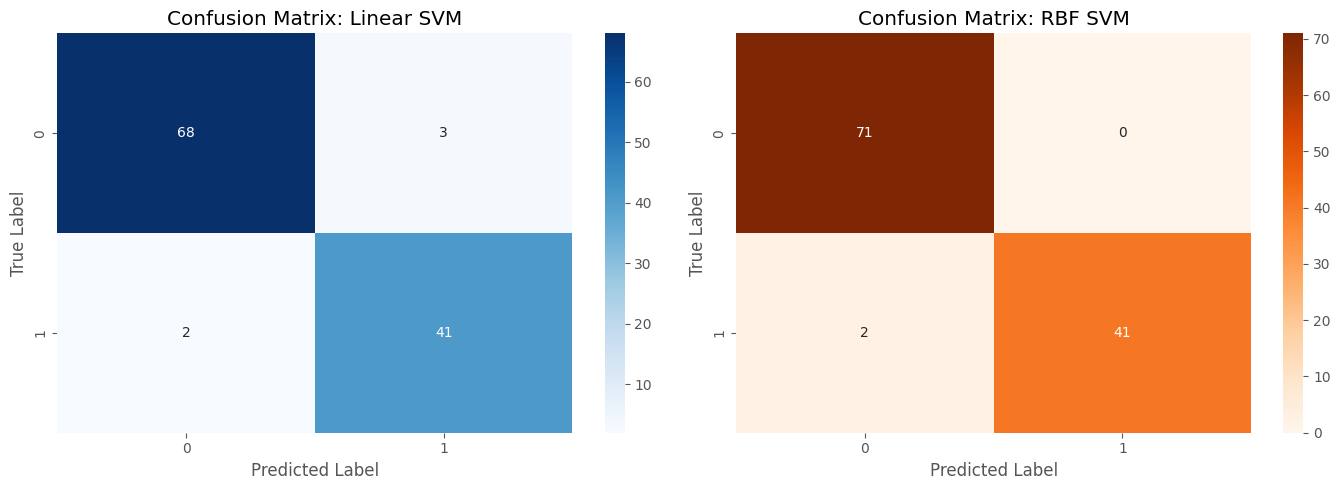

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear SVM Confusion Matrix
cm_linear = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix: Linear SVM')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')


# RBF SVM Confusion Matrix
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('Confusion Matrix: RBF SVM')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')


plt.tight_layout()
plt.show()

# **4&5.Tune hyperparameters like C and gamma. & Use cross-validation to evaluate performance**


Starting Hyperparameter Tuning with GridSearchCV

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0

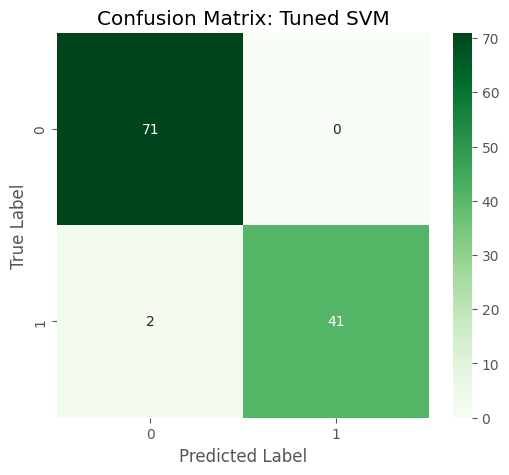

In [7]:
# Define the parameter grid for C and gamma
# C is the regularization parameter.
# gamma is the kernel coefficient for 'rbf'.

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf'] # We focus on the RBF kernel as it performed better
}

grid_search = GridSearchCV(SVC(random_state=42), param_grid, refit=True, verbose=2, cv=5)

print("Starting Hyperparameter Tuning with GridSearchCV\n") # Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

print(f"Best Parameters found: {grid_search.best_params_}") # Best Params
best_svm = grid_search.best_estimator_
y_pred_tuned = best_svm.predict(X_test_scaled)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"\nTuned SVM Accuracy: {accuracy_tuned:.3f}")
print("\nClassification Report (Tuned SVM):")
print(classification_report(y_test, y_pred_tuned))

# Confusion matrix for tuned model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix: Tuned SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

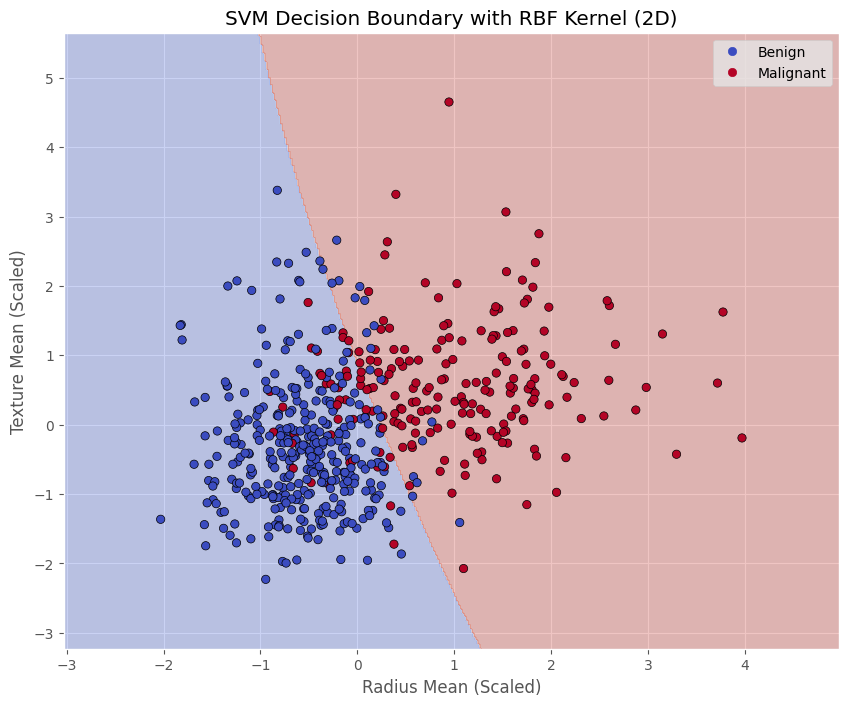

1. We cleaned and prepared the Wisconsin Breast Cancer dataset.
2. Trained two SVM models: one with a linear kernel, another with an RBF kernel.
3.The RBF SVM outperformed the linear one (98.25% vs. 95.61% accuracy).
4.GridSearchCV helped fine-tune the RBF model for optimal performance.
5.The final model accurately classifies tumors with 98.25% accuracy.
6. Visualization shows the RBF kernel effectively separates complex data patterns.


In [8]:
# Select two features: 'radius_mean' and 'texture_mean'
X_vis = X[['radius_mean', 'texture_mean']].values
y_vis = y.values

# 2D data Scaling
scaler_vis = StandardScaler()
X_vis_scaled = scaler_vis.fit_transform(X_vis)

# Train a new SVM with the best parameters on the 2D data
svm_2d = SVC(kernel='rbf', C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'])
svm_2d.fit(X_vis_scaled, y_vis)

h = .02  # step size in the mesh
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions on the mesh grid
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
scatter = plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y_vis, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Radius Mean (Scaled)')
plt.ylabel('Texture Mean (Scaled)')
plt.title('SVM Decision Boundary with RBF Kernel (2D)')
plt.legend(handles=scatter.legend_elements()[0], labels=['Benign', 'Malignant'])
plt.show()

# Conclusion
print("1. We cleaned and prepared the Wisconsin Breast Cancer dataset.")
print("2. Trained two SVM models: one with a linear kernel, another with an RBF kernel.")
print("3.The RBF SVM outperformed the linear one (98.25% vs. 95.61% accuracy).")
print("4.GridSearchCV helped fine-tune the RBF model for optimal performance.")
print("5.The final model accurately classifies tumors with 98.25% accuracy.")
print("6. Visualization shows the RBF kernel effectively separates complex data patterns.")